In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from collections import Counter

In [10]:
# importing the iris dstasets
iris=datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                     columns=iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#split into X and Y

In [25]:
X=iris_df.iloc[:,0:4] # iris_df.iloc[:,:-1]
y=iris_df.iloc[:,-1]


In [26]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

##Splitng into traing and testing#

In [35]:
X_train,X_test,y_train ,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)


X_train=np.asarray(X_train)
y_train=np.asarray(y_train)

X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [36]:
print(f"traning sets size: {X_train.shape[0]} sample \ntest sets size:{X_test.shape[0]} sample")

traning sets size: 120 sample 
test sets size:30 sample


#NORMALIZE THE DATASETS

In [37]:
scaler=Normalizer().fit(X_train)
normalized_X_train=scaler.transform(X_train)
normalized_X_test=scaler.transform(X_test)

In [39]:
print("X_train before normalization")
print(X_train[0:5])
print("X_train after normalization")
print(normalized_X_train[0:5])

X_train before normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
X_train after normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


# visulized the datasets before and after the normalization


Text(0.5, 1.08, 'pair plot of the datasets After normalization')

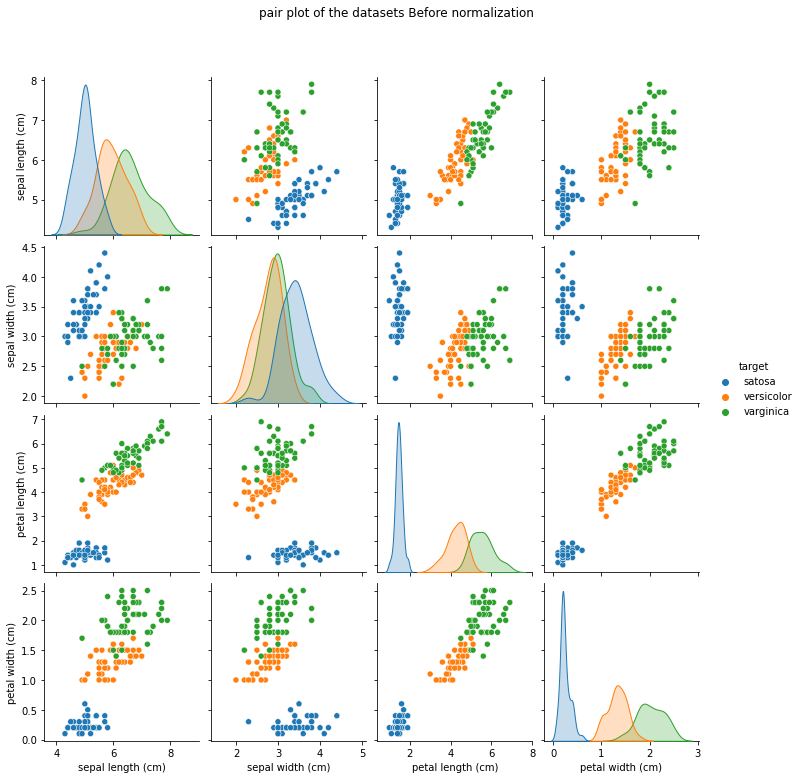

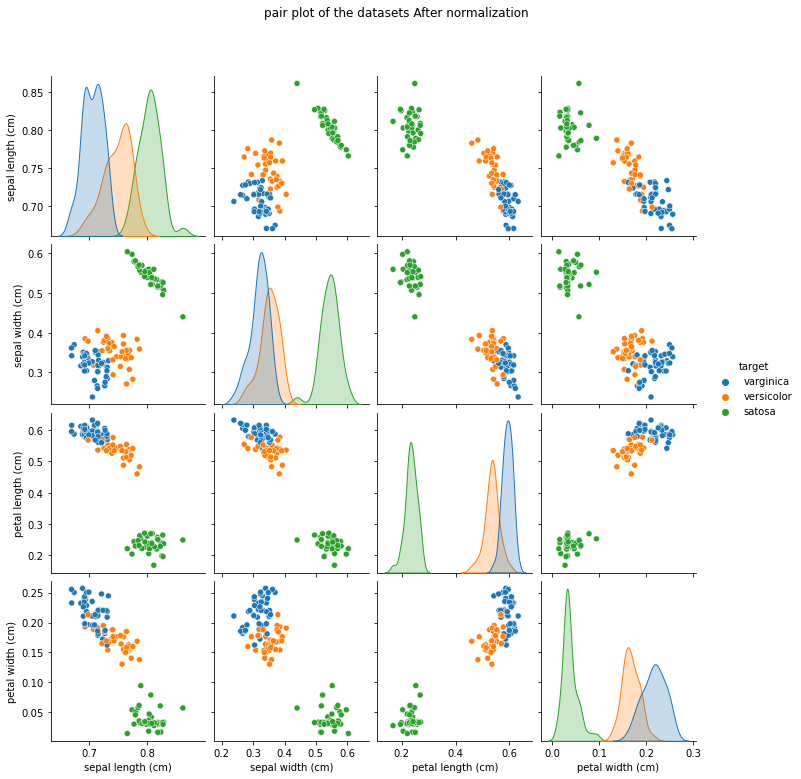

In [42]:
## Before
## view the relationnship between :color code by species type

d1={0.0:"satosa",1.0:"versicolor",2.0:"varginica"}
Before=sns.pairplot(iris_df.replace({"target":d1}),hue="target")
Before.fig.suptitle("pair plot of the datasets Before normalization",y=1.08)

#After
iris_df2=pd.DataFrame(data=np.c_[normalized_X_train,y_train],
                     columns=iris['feature_names']+['target'])

d1={0.0:"satosa",1.0:"versicolor",2.0:"varginica"}
after=sns.pairplot(iris_df2.replace({"target":d1}),hue="target")
after.fig.suptitle("pair plot of the datasets After normalization",y=1.08)
